# Тестовое задание:

# В качестве тестового задания предлагаем сделать анализ предложенного датасета с фактической и прогнозной численностью населения в городах. Интересны социально-экономические выводы и гипотезы по дальнейшей работе с этими данными.

In [1]:
import numpy as np
import pandas as pd


from pandas import Series
from pandas import DataFrame
from pandas import read_csv

import seaborn as sns



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor





from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator


from sklearn.metrics import (   mean_squared_error,
                                mean_absolute_error,
                                mean_absolute_percentage_error,
                                r2_score,
                                root_mean_squared_error,
                                nan_euclidean_distances,
                                euclidean_distances,
                                )



from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.pipeline import Pipeline


import xgboost as xgb
from matplotlib import pyplot


from modification import MOD
from warnings import filterwarnings
filterwarnings(action='ignore')


In [2]:
df_test=read_csv('CityDataTest.csv')

In [3]:
df_test.head()

,Город;year;fact;Модель;Нижняя граница;Верхняя граница
0,Белокуриха;2000;NA;15400;15100;15700
1,Белокуриха;2001;NA;15400;15100;15700
2,Белокуриха;2002;NA;15400;15000;15700
3,Белокуриха;2003;NA;15300;15000;15700
4,Белокуриха;2004;NA;15300;14900;15600


# Без Городов

In [4]:
df=read_csv('city_data.csv').iloc[:, 1:]
print(f"{len(df)}")

df.drop_duplicates(inplace=True, ignore_index=True)
print(f"{len(df)}")


30250
29951


# одно абсолютное сходство  несмотря на max_value

In [5]:
df=read_csv('city_data.csv').iloc[:,:-2]

print(f"{len(df)}")
print(len(df.drop_duplicates(inplace=False, ignore_index=True)))


30250
30249


In [6]:
df=read_csv('city_data.csv')
df

,town,year,factual,model,min_value,max_value,indicator_nan
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0,True
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0,True
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0,True
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0,True
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0,True
...,...,...,...,...,...,...,...
30245,Облучье,2116,NaN,300.0,100.0,800.0,True
30246,Облучье,2117,NaN,300.0,100.0,800.0,True
30247,Облучье,2118,NaN,300.0,100.0,800.0,True
30248,Облучье,2119,NaN,300.0,100.0,800.0,True


In [7]:
df.isna().sum()

town                 0
year                 0
factual          27000
model                0
min_value            0
max_value            0
indicator_nan        0
dtype: int64

In [8]:
df

,town,year,factual,model,min_value,max_value,indicator_nan
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0,True
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0,True
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0,True
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0,True
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0,True
...,...,...,...,...,...,...,...
30245,Облучье,2116,NaN,300.0,100.0,800.0,True
30246,Облучье,2117,NaN,300.0,100.0,800.0,True
30247,Облучье,2118,NaN,300.0,100.0,800.0,True
30248,Облучье,2119,NaN,300.0,100.0,800.0,True


<Axes: >

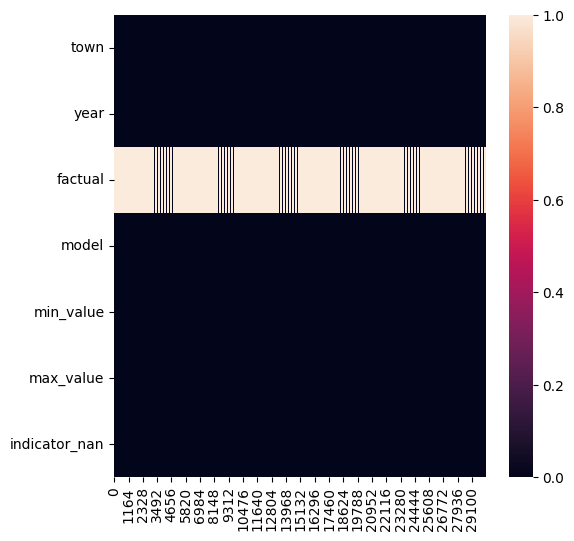

In [9]:
pyplot.figure(figsize=(6,6))
sns.heatmap(df.isna().T)

# хорошо видно что данные отсутствуют .
# В промежутках через каждые 5000 находятся известные
# factual  данные . В остальных признаках нету белого цвета.  

# Стандартные подходы 

In [10]:
data=df.copy()

data.factual.fillna(data.factual.median(), inplace=True)
data.factual=np.clip(data.factual, data.min_value, data.max_value)
data

,town,year,factual,model,min_value,max_value,indicator_nan
0,Белокуриха,2000,15700.0,15400.0,15100.0,15700.0,True
1,Белокуриха,2001,15700.0,15400.0,15100.0,15700.0,True
2,Белокуриха,2002,15700.0,15400.0,15000.0,15700.0,True
3,Белокуриха,2003,15700.0,15300.0,15000.0,15700.0,True
4,Белокуриха,2004,15600.0,15300.0,14900.0,15600.0,True
...,...,...,...,...,...,...,...
30245,Облучье,2116,800.0,300.0,100.0,800.0,True
30246,Облучье,2117,800.0,300.0,100.0,800.0,True
30247,Облучье,2118,800.0,300.0,100.0,800.0,True
30248,Облучье,2119,800.0,300.0,100.0,800.0,True


In [11]:
data=df.copy()

data.factual.fillna(data.factual.mean(), inplace=True)

data.factual=np.clip(data.factual, data.min_value, data.max_value)
data

,town,year,factual,model,min_value,max_value,indicator_nan
0,Белокуриха,2000,15700.0,15400.0,15100.0,15700.0,True
1,Белокуриха,2001,15700.0,15400.0,15100.0,15700.0,True
2,Белокуриха,2002,15700.0,15400.0,15000.0,15700.0,True
3,Белокуриха,2003,15700.0,15300.0,15000.0,15700.0,True
4,Белокуриха,2004,15600.0,15300.0,14900.0,15600.0,True
...,...,...,...,...,...,...,...
30245,Облучье,2116,800.0,300.0,100.0,800.0,True
30246,Облучье,2117,800.0,300.0,100.0,800.0,True
30247,Облучье,2118,800.0,300.0,100.0,800.0,True
30248,Облучье,2119,800.0,300.0,100.0,800.0,True


In [12]:
len(df.town.unique())

248

In [13]:
is_not_nan=DataFrame([df.iloc[index,:] for index, indicator in enumerate(df.factual.isna()) if indicator==False])

In [14]:
MOD.model_metrics['special_metrics']=MOD.get_metrics(is_not_nan.factual.to_numpy().reshape(-1,1), is_not_nan.model.to_numpy().reshape(-1,1))

In [15]:
MOD.model_metrics

,special_metrics
mean_squared_error,3.625881e+07
mean_absolute_error,1.015663e+03
mean_absolute_percentage_error,1.149876e-02
r2_score,9.999384e-01
root_mean_squared_error,6.021529e+03


In [16]:
#disp
np.var(is_not_nan.factual)/len(is_not_nan.index)

181236251.72495678

In [17]:


DATA=df.copy()
encoder = OneHotEncoder()
encoded_towns = encoder.fit_transform(DATA[['town']]).toarray()
encoded_towns_df = pd.DataFrame(encoded_towns, columns=encoder.get_feature_names_out(['town']))
DATA = pd.concat([DATA.reset_index(drop=True), encoded_towns_df], axis=1)
DATA.drop(columns=['town'], inplace=True)

In [18]:
DATA

,year,factual,model,min_value,max_value,indicator_nan,town_ Буй,town_ Оха,town_ Реж,town_ Уфа,...,town_Электрогорск,town_Электросталь,town_Югорск,town_Юрьев-Польский,town_Юхнов,town_Якутск,town_Ялта,town_Ялуторовск,town_Ярославль,town_Ясногорск
0,2000,NaN,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,NaN,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,NaN,15400.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,NaN,15300.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,NaN,15300.0,14900.0,15600.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2116,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30246,2117,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30247,2118,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30248,2119,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
MOD.r2_score_adjusted

<function modification.MOD.r2_score_adjusted(y_pred, y_test, X_test)>

# Скорректированный коэффициент детерминации (R2 ) лучше, чем обычный коэффициент детерминации (R2 ), потому что он учитывает количество предикторов (независимых переменных) в модели. Обычный R2 всегда увеличивается при добавлении новых предикторов, даже если они не значимы, что может привести к переобучению модели. В отличие от него, скорректированный R2 включает штраф за добавление лишних предикторов и уменьшается, если новые предикторы не улучшают модель существенно. Это делает скорректированный R2 более надежным показателем качества модели, особенно при наличии большого количества предикторов.

In [20]:
data=DATA.copy()

In [21]:
data['factual'].isna().sum()/len(data.index)

0.8925619834710744

In [29]:
data

,year,factual,model,min_value,max_value,indicator_nan,town_ Буй,town_ Оха,town_ Реж,town_ Уфа,...,town_Электрогорск,town_Электросталь,town_Югорск,town_Юрьев-Польский,town_Юхнов,town_Якутск,town_Ялта,town_Ялуторовск,town_Ярославль,town_Ясногорск
0,2000,NaN,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,NaN,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,NaN,15400.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,NaN,15300.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,NaN,15300.0,14900.0,15600.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2116,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30246,2117,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30247,2118,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30248,2119,NaN,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
known_data=data[~data.factual.isna()]
unknown_data=data[data.factual.isna()]

X_train, y_train=known_data.drop(columns=['factual']), known_data['factual']
X_test, y_test=unknown_data.drop(columns=['factual']), unknown_data['factual']

In [22]:
knn=KNNImputer(n_neighbors=10)
factual_values = data["factual"].to_numpy()
imputed_values = knn.fit_transform(factual_values.reshape(-1, 1))
imputed_series = Series(imputed_values.ravel(), name="factual")
imputed_series

0        127138.169846
1        127138.169846
2        127138.169846
3        127138.169846
4        127138.169846
             ...      
30245    127138.169846
30246    127138.169846
30247    127138.169846
30248    127138.169846
30249    127138.169846
Name: factual, Length: 30250, dtype: float64

In [46]:
MOD.model_metrics['KNNImputer']=MOD.get_metrics(imputed_series, data.model)

In [47]:
imputed_series.isna().sum()

0

In [48]:
imputed_series=pd.Series(np.clip(imputed_series, data['min_value'], data['max_value']))
MOD.model_metrics['KNNImputer_clip' ]=MOD.get_metrics(imputed_series, data.model)

In [49]:
MOD.model_metrics

,special_metrics,KNNImputer,KNNImputer_clip
mean_squared_error,3.625881e+07,7.237041e+11,3.274865e+07
mean_absolute_error,1.015663e+03,1.575200e+05,1.426026e+03
mean_absolute_percentage_error,1.149876e-02,1.239344e+00,3.587468e-02
r2_score,9.999384e-01,-1.043601e+01,9.999579e-01
root_mean_squared_error,6.021529e+03,8.507080e+05,5.722644e+03


# KNeighborsRegressor

In [50]:
known_data=data[~data.factual.isna()]
unknown_data=data[data.factual.isna()]

X_train, y_train=known_data.drop(columns=['factual']), known_data['factual']
X_test, y_test=unknown_data.drop(columns=['factual']), unknown_data['factual']

In [53]:
data=DATA.copy()

target_column = "factual"
features_columns =data.columns.drop([target_column])
imputer = KNeighborsRegressor(n_neighbors=50)


imputer.fit(X_train, y_train)

y_pred=imputer.predict(X_test)
data.loc[data[target_column].isna(), target_column] = y_pred



In [56]:
X_test['model']

27000

In [57]:
len(y_pred)

27000

In [58]:
MOD.model_metrics['KNeighborsRegressor']=MOD.get_metrics(y_pred,X_test['model'])
data.factual=np.clip(data['factual'], data['min_value'], data['max_value'])
MOD.model_metrics['KNeighborsRegressor_clip']=MOD.get_metrics(y_pred,X_test['model'])

In [59]:
MOD.model_metrics

,special_metrics,KNNImputer,KNNImputer_clip,KNeighborsRegressor,KNeighborsRegressor_clip
mean_squared_error,3.625881e+07,7.237041e+11,3.274865e+07,4.261059e+11,4.261059e+11
mean_absolute_error,1.015663e+03,1.575200e+05,1.426026e+03,4.689609e+04,4.689609e+04
mean_absolute_percentage_error,1.149876e-02,1.239344e+00,3.587468e-02,7.400264e-02,7.400264e-02
r2_score,9.999384e-01,-1.043601e+01,9.999579e-01,-4.556790e+00,-4.556790e+00
root_mean_squared_error,6.021529e+03,8.507080e+05,5.722644e+03,6.527679e+05,6.527679e+05


# RandomForestRegressor

In [60]:
data=DATA.copy()
known_data=data[~data.factual.isna()]
unknown_data=data[data.factual.isna()]

X_train, y_train=known_data.drop(columns=['factual']), known_data['factual']
X_test, y_test=unknown_data.drop(columns=['factual']), unknown_data['factual']

model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_unknown = unknown_data[data.columns.drop('factual')]
y_unknown_pred = model.predict(X_unknown)

In [61]:
data.factual[data.factual.isna()]=y_unknown_pred

In [62]:
MOD.model_metrics['RandomForestRegressor']=MOD.get_metrics(y_pred,X_test['model'])
data.factual=np.clip(data['factual'],data['min_value'], data['max_value'])
MOD.model_metrics['RandomForestRegressor_clip']=MOD.get_metrics(y_pred,X_test['model'])

In [63]:
MOD.model_metrics

,special_metrics,KNNImputer,KNNImputer_clip,KNeighborsRegressor,KNeighborsRegressor_clip,RandomForestRegressor,RandomForestRegressor_clip
mean_squared_error,3.625881e+07,7.237041e+11,3.274865e+07,4.261059e+11,4.261059e+11,1.417112e+10,1.417112e+10
mean_absolute_error,1.015663e+03,1.575200e+05,1.426026e+03,4.689609e+04,4.689609e+04,9.516241e+03,9.516241e+03
mean_absolute_percentage_error,1.149876e-02,1.239344e+00,3.587468e-02,7.400264e-02,7.400264e-02,5.035647e-02,5.035647e-02
r2_score,9.999384e-01,-1.043601e+01,9.999579e-01,-4.556790e+00,-4.556790e+00,9.780035e-01,9.780035e-01
root_mean_squared_error,6.021529e+03,8.507080e+05,5.722644e+03,6.527679e+05,6.527679e+05,1.190425e+05,1.190425e+05


In [64]:
data=DATA.copy()
known_data = data.dropna(subset=['factual'])
unknown_data = data[data['factual'].isna()]
X = known_data[known_data.columns.drop('factual')]
y = known_data['factual']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LinearRegression

In [65]:

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)


# Предсказание на тестовой выборке и оценка модели
y_pred = model.predict(X_test)

# Предсказание для неизвестных значений
X_unknown = unknown_data[unknown_data.columns.drop('factual')]
y_unknown_pred = model.predict(X_unknown)

data.factual[data.factual.isna()]=y_unknown_pred


In [66]:
MOD.model_metrics['LinearRegression']=MOD.get_metrics(y_pred,X_test['model'])
data.factual=np.clip(data['factual'], data['min_value'], data['max_value'])
MOD.model_metrics['LinearRegression_clip']=MOD.get_metrics(y_pred,X_test['model'])

# XGBoost

In [67]:
data=DATA.copy()

In [68]:
# !pip install xgboost

In [69]:

# Обучение модели XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dunknown = xgb.DMatrix(X_unknown)

params = {
    'objective': 'reg:squarederror',
    'max_depth': len(X_train)-1,
    'learning_rate': 0.1,
    'n_estimators': 100
}


In [70]:

model = xgb.train(params, dtrain, num_boost_round=100)

# Предсказание на тестовой выборке и оценка модели
y_pred = model.predict(dtest)

# Предсказание для неизвестных значений
y_unknown_pred = model.predict(dunknown)


In [71]:
data.factual[data.factual.isna()]=y_unknown_pred

In [72]:
MOD.model_metrics['XGBoost']=MOD.get_metrics(y_pred,X_test['model'])
data.factual=np.clip(data['factual'], data['min_value'], data['max_value'])
MOD.model_metrics['XGBoost_clip']=MOD.get_metrics(y_pred,X_test['model'])

# Ridge

In [73]:
data=DATA.copy()

In [74]:

# Обучение модели Ridge Regression
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [75]:


# Предсказание на тестовой выборке и оценка модели
y_pred = model.predict(X_test)


In [76]:
model.score(X_test, y_test)

0.9998532014875028

In [77]:
y_unknown_pred=model.predict(unknown_data[unknown_data.columns.drop('factual')])

In [78]:
data.factual[data.factual.isna()]=y_unknown_pred

In [79]:
MOD.model_metrics['Ridge']=MOD.get_metrics(y_pred,X_test['model'])
data.factual=np.clip(data['factual'], data['min_value'], data['max_value'])
MOD.model_metrics['Ridge_clip']=MOD.get_metrics(y_pred,X_test['model'])

# Lasso

In [80]:

data=DATA.copy()
# Обучение модели Ridge Regression
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
# Предсказание на тестовой выборке и оценка модели
y_pred = model.predict(X_test)

y_unknown_pred=model.predict(unknown_data[unknown_data.columns.drop('factual')])
data.factual[data.factual.isna()]=y_unknown_pred

In [81]:
MOD.model_metrics['Lasso']=MOD.get_metrics(y_pred,X_test['model'])
data.factual=np.clip(data['factual'], data['min_value'], data['max_value'])
MOD.model_metrics['Lasso_clip']=MOD.get_metrics(y_pred,X_test['model'])

# ElasticNet

In [82]:
data=DATA.copy()

model=ElasticNet(l1_ratio=0.5,random_state=1961)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_unknown_pred=model.predict(unknown_data[unknown_data.columns.drop('factual')])
data.factual[data.factual.isna()]=y_unknown_pred

In [83]:
MOD.model_metrics['ElasticNet']=MOD.get_metrics(y_pred,X_test['model'])
data.factual=np.clip(data['factual'], data['min_value'], data['max_value'])
MOD.model_metrics['ElasticNet_clip']=MOD.get_metrics(y_pred,X_test['model'])

In [89]:
MOD.model_metrics

,special_metrics,KNNImputer,KNNImputer_clip,KNeighborsRegressor,KNeighborsRegressor_clip,RandomForestRegressor,RandomForestRegressor_clip,LinearRegression,LinearRegression_clip,XGBoost,XGBoost_clip,Ridge,Ridge_clip,Lasso,Lasso_clip,ElasticNet,ElasticNet_clip
mean_squared_error,3.625881e+07,7.237041e+11,3.274865e+07,4.261059e+11,4.261059e+11,1.417112e+10,1.417112e+10,3.223000e+06,3.223000e+06,3.725021e+07,3.725021e+07,1.957818e+06,1.957818e+06,2.071131e+06,2.071131e+06,861518.204482,861518.204482
mean_absolute_error,1.015663e+03,1.575200e+05,1.426026e+03,4.689609e+04,4.689609e+04,9.516241e+03,9.516241e+03,7.132602e+02,7.132602e+02,1.253265e+03,1.253265e+03,4.576824e+02,4.576824e+02,3.806575e+02,3.806575e+02,445.577308,445.577308
mean_absolute_percentage_error,1.149876e-02,1.239344e+00,3.587468e-02,7.400264e-02,7.400264e-02,5.035647e-02,5.035647e-02,1.887024e-02,1.887024e-02,1.193243e-02,1.193243e-02,7.721316e-03,7.721316e-03,5.671710e-03,5.671710e-03,0.012021,0.012021
r2_score,9.999384e-01,-1.043601e+01,9.999579e-01,-4.556790e+00,-4.556790e+00,9.780035e-01,9.780035e-01,9.998626e-01,9.998626e-01,9.984343e-01,9.984343e-01,9.999165e-01,9.999165e-01,9.999116e-01,9.999116e-01,0.999963,0.999963
root_mean_squared_error,6.021529e+03,8.507080e+05,5.722644e+03,6.527679e+05,6.527679e+05,1.190425e+05,1.190425e+05,1.795272e+03,1.795272e+03,6.103295e+03,6.103295e+03,1.399221e+03,1.399221e+03,1.439142e+03,1.439142e+03,928.180050,928.180050


# Лучшая по сходимости с special_metrics

In [84]:
mod_metrics=DataFrame(MOD.model_metrics.values.T)
other_models,special_metric=mod_metrics.drop(index=[4]), mod_metrics.values[4]


distances = [np.linalg.norm(x - special_metric) for x in other_models.values]
min_index = np.argmin(distances)  # exclude the 4th element itself

min_index = min_index + 1 if min_index >= 4 else min_index

MOD.model_metrics.columns[min_index]

'KNeighborsRegressor'

In [86]:
MOD.model_metrics.columns[min_index]

'KNeighborsRegressor'

In [ ]:
MOD.approaching_the_model(data=data)

In [91]:
data=DATA.copy()

In [92]:
# Pipeline c KNeighborsRegressor c поиском лучших гиперпараметров 

In [93]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet(random_state=1961))
])

# Определяем сетку гиперпараметров для подбора
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

# Настраиваем GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучаем модель с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Предсказываем значения на тестовых данных
y_pred = best_model.predict(X_test)

# Предсказываем значения для неизвестных данных
unknown_data = data[data['factual'].isna()]
y_unknown_pred = best_model.predict(unknown_data.drop(columns=['factual']))

# Заполняем пропущенные значения в исходных данных
data.loc[data['factual'].isna(), 'factual'] = y_unknown_pred


In [94]:
data

,year,factual,model,min_value,max_value,indicator_nan,town_ Буй,town_ Оха,town_ Реж,town_ Уфа,...,town_Электрогорск,town_Электросталь,town_Югорск,town_Юрьев-Польский,town_Юхнов,town_Якутск,town_Ялта,town_Ялуторовск,town_Ярославль,town_Ясногорск
0,2000,12558.483823,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,12767.543463,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,12950.545173,15400.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,13133.671448,15300.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,13290.860466,15300.0,14900.0,15600.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2116,24032.602873,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30246,2117,24241.662513,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30247,2118,24450.722153,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30248,2119,24659.781793,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
data.factual=np.clip(data.factual, data.min_value, data.max_value)

In [96]:
data

,year,factual,model,min_value,max_value,indicator_nan,town_ Буй,town_ Оха,town_ Реж,town_ Уфа,...,town_Электрогорск,town_Электросталь,town_Югорск,town_Юрьев-Польский,town_Юхнов,town_Якутск,town_Ялта,town_Ялуторовск,town_Ярославль,town_Ясногорск
0,2000,15100.0,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,15100.0,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,15000.0,15400.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,15000.0,15300.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,14900.0,15300.0,14900.0,15600.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2116,800.0,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30246,2117,800.0,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30247,2118,800.0,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30248,2119,800.0,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
data.factual=MOD.approaching_the_model(data)

In [98]:
MOD.get_metrics(data.factual, data.model)

{'mean_squared_error': 18825663.532033056,
 'mean_absolute_error': 1037.405355371901,
 'mean_absolute_percentage_error': 0.02934993006530547,
 'r2_score': 0.9999758858294108,
 'root_mean_squared_error': 4338.855094611141}

In [99]:
data

,year,factual,model,min_value,max_value,indicator_nan,town_ Буй,town_ Оха,town_ Реж,town_ Уфа,...,town_Электрогорск,town_Электросталь,town_Югорск,town_Юрьев-Польский,town_Юхнов,town_Якутск,town_Ялта,town_Ялуторовск,town_Ярославль,town_Ясногорск
0,2000,15194,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,15215,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,15099,15400.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,15129,15300.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,14970,15300.0,14900.0,15600.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2116,594,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30246,2117,753,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30247,2118,661,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30248,2119,621,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


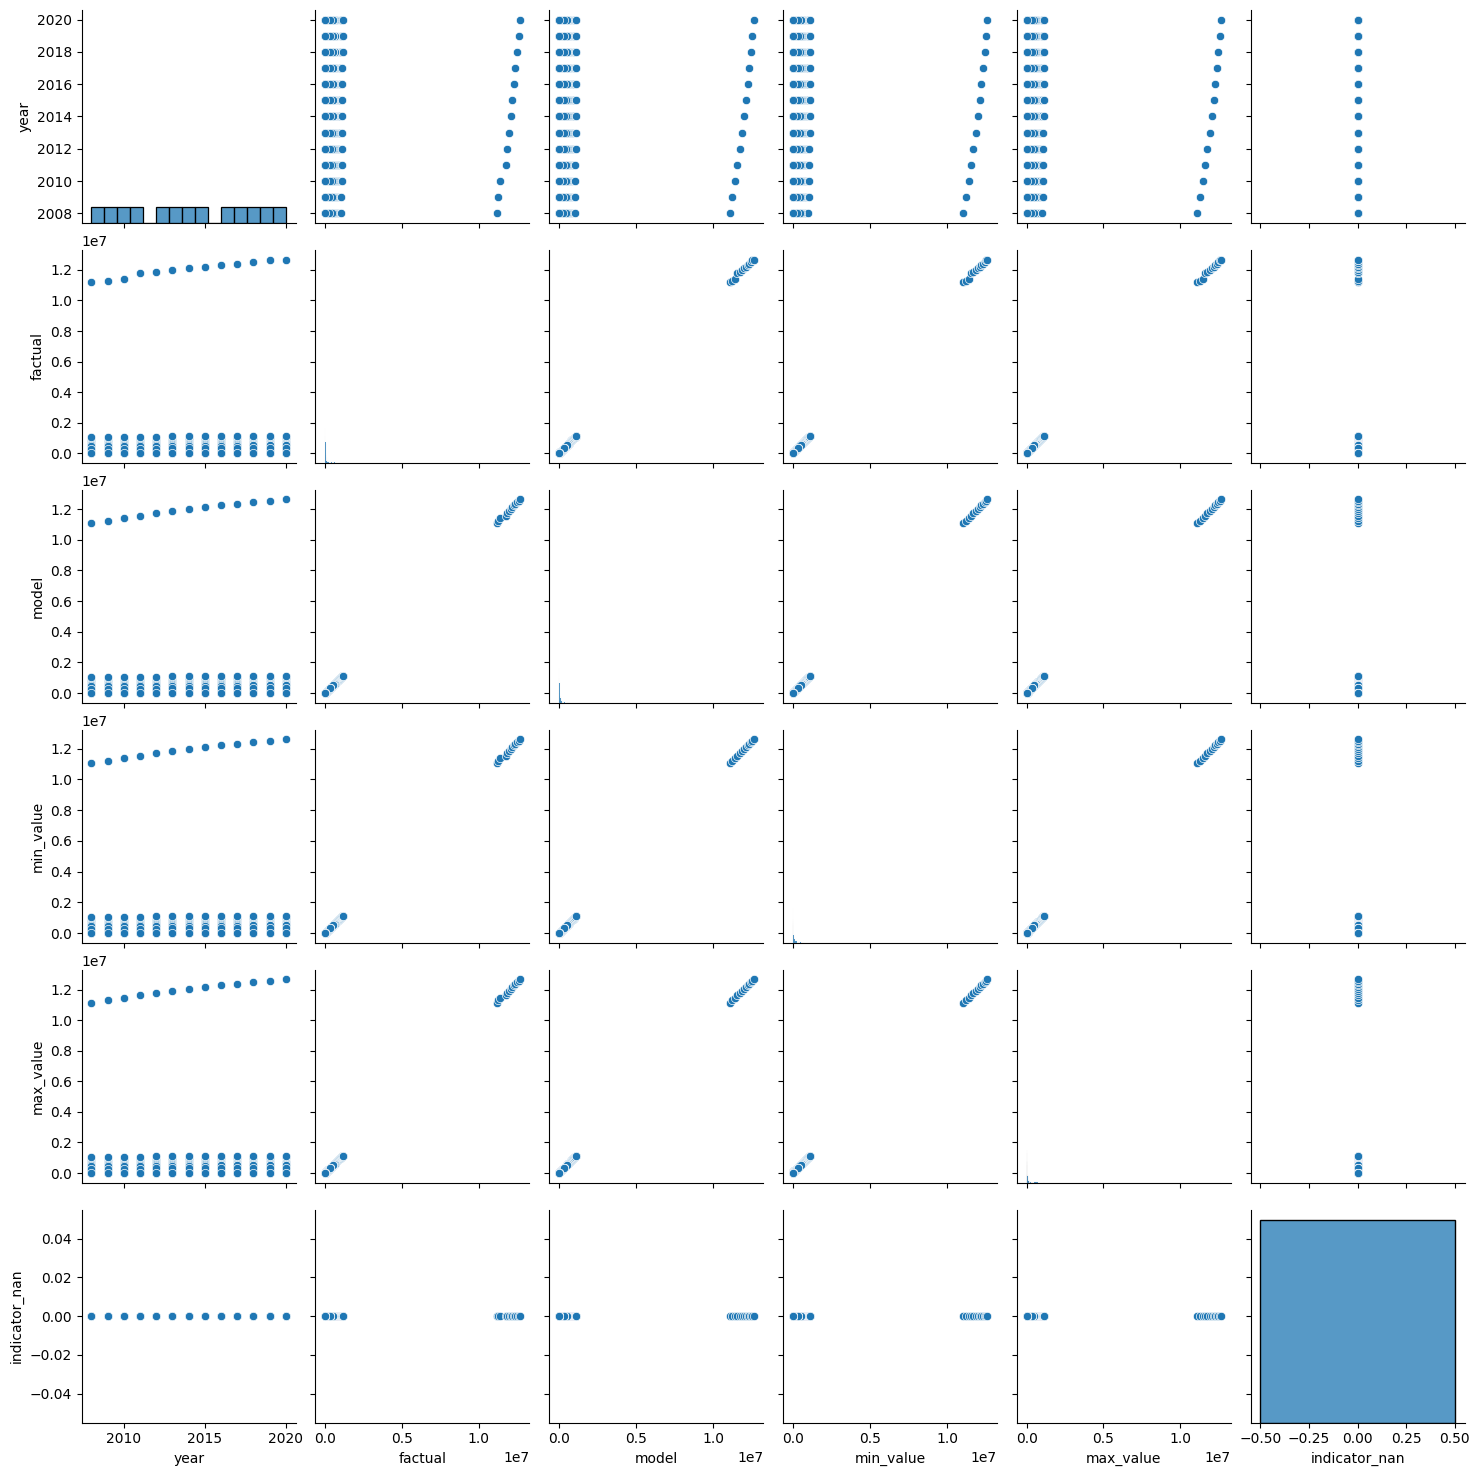

In [104]:
sns.pairplot(df.dropna())
pyplot.show()

Correlation Matrix:
                   year   factual     model  min_value  max_value  \
year           1.000000  0.003560  0.003428   0.003495   0.003359   
factual        0.003560  1.000000  0.999987   0.999983   0.999978   
model          0.003428  0.999987  1.000000   0.999996   0.999992   
min_value      0.003495  0.999983  0.999996   1.000000   0.999979   
max_value      0.003359  0.999978  0.999992   0.999979   1.000000   
indicator_nan       NaN       NaN       NaN        NaN        NaN   

               indicator_nan  
year                     NaN  
factual                  NaN  
model                    NaN  
min_value                NaN  
max_value                NaN  
indicator_nan            NaN  


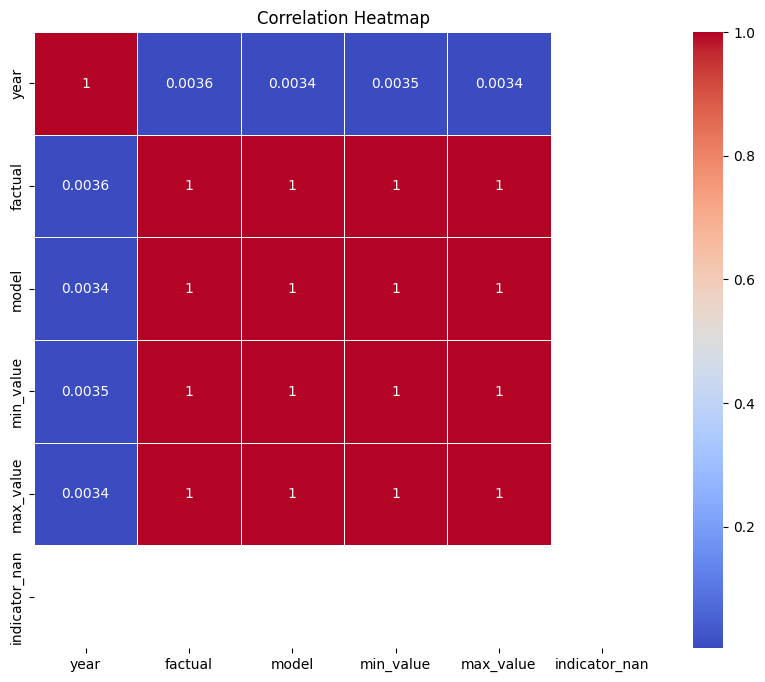

In [106]:
# Calculate the correlation matrix
correlation_matrix = df.dropna().drop(columns=['town']).corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
pyplot.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
pyplot.title('Correlation Heatmap')
pyplot.show()

### Эти результаты показывают матрицу корреляции между переменными в данных. Большинство значений, особенно между factual, model, min_value и max_value, близки к 1, что указывает на сильную положительную линейную связь между этими переменными. Однако корреляция между year и другими переменными очень низкая (около 0.003), что указывает на отсутствие значимой линейной зависимости. Значение корреляции для indicator_nan не определено (NaN), что может свидетельствовать о её отсутствии в числовом контексте данных.

In [108]:
data

,year,factual,model,min_value,max_value,indicator_nan,town_ Буй,town_ Оха,town_ Реж,town_ Уфа,...,town_Электрогорск,town_Электросталь,town_Югорск,town_Юрьев-Польский,town_Юхнов,town_Якутск,town_Ялта,town_Ялуторовск,town_Ярославль,town_Ясногорск
0,2000,15194,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001,15215,15400.0,15100.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,15099,15400.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,15129,15300.0,15000.0,15700.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004,14970,15300.0,14900.0,15600.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2116,594,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30246,2117,753,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30247,2118,661,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30248,2119,621,300.0,100.0,800.0,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
df=DataFrame(df.town).join((data.loc[:, 'year':'max_value']).astype('int'))

In [129]:
df=DataFrame([';'.join(values) for values in df.astype('str').values] , columns=[';'.join(df_test)])

In [130]:
df

,Город;year;fact;Модель;Нижняя граница;Верхняя граница
0,Белокуриха;2000;15194;15400;15100;15700
1,Белокуриха;2001;15215;15400;15100;15700
2,Белокуриха;2002;15099;15400;15000;15700
3,Белокуриха;2003;15129;15300;15000;15700
4,Белокуриха;2004;14970;15300;14900;15600
...,...
30245,Облучье;2116;594;300;100;800
30246,Облучье;2117;753;300;100;800
30247,Облучье;2118;661;300;100;800
30248,Облучье;2119;621;300;100;800


In [131]:
df.to_csv('final_edit.csv')